In [1]:
# Step 1: Import Required Libraries
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn components
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# Machine learning models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Step 2: Load and Prepare Data
# Load datasets
train_df = pd.read_csv("Training.csv")
test_df = pd.read_csv("Testing.csv")

# Clean data by removing unnamed columns
train_df = train_df.loc[:, ~train_df.columns.str.contains('^Unnamed')]
test_df = test_df.loc[:, ~test_df.columns.str.contains('^Unnamed')]

# Display basic info
print("Training Data Shape:", train_df.shape)
print("Testing Data Shape:", test_df.shape)
print("\nTraining Data Columns:", train_df.columns.tolist())
print("\nSample of Training Data:")
display(train_df.head())

Training Data Shape: (4920, 133)
Testing Data Shape: (42, 133)

Training Data Columns: ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


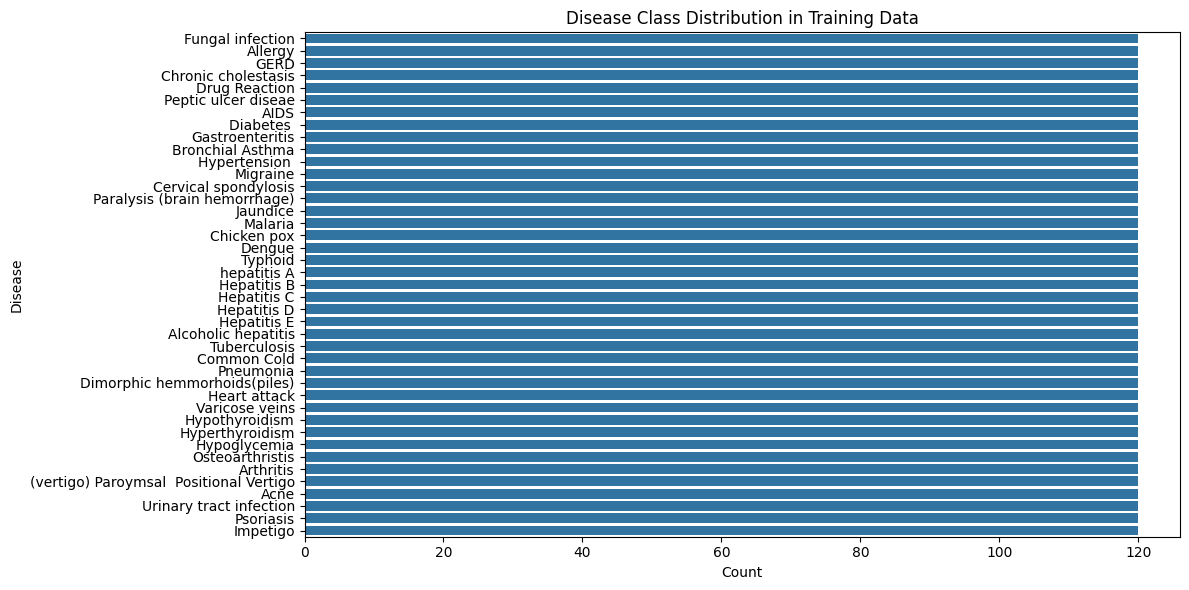

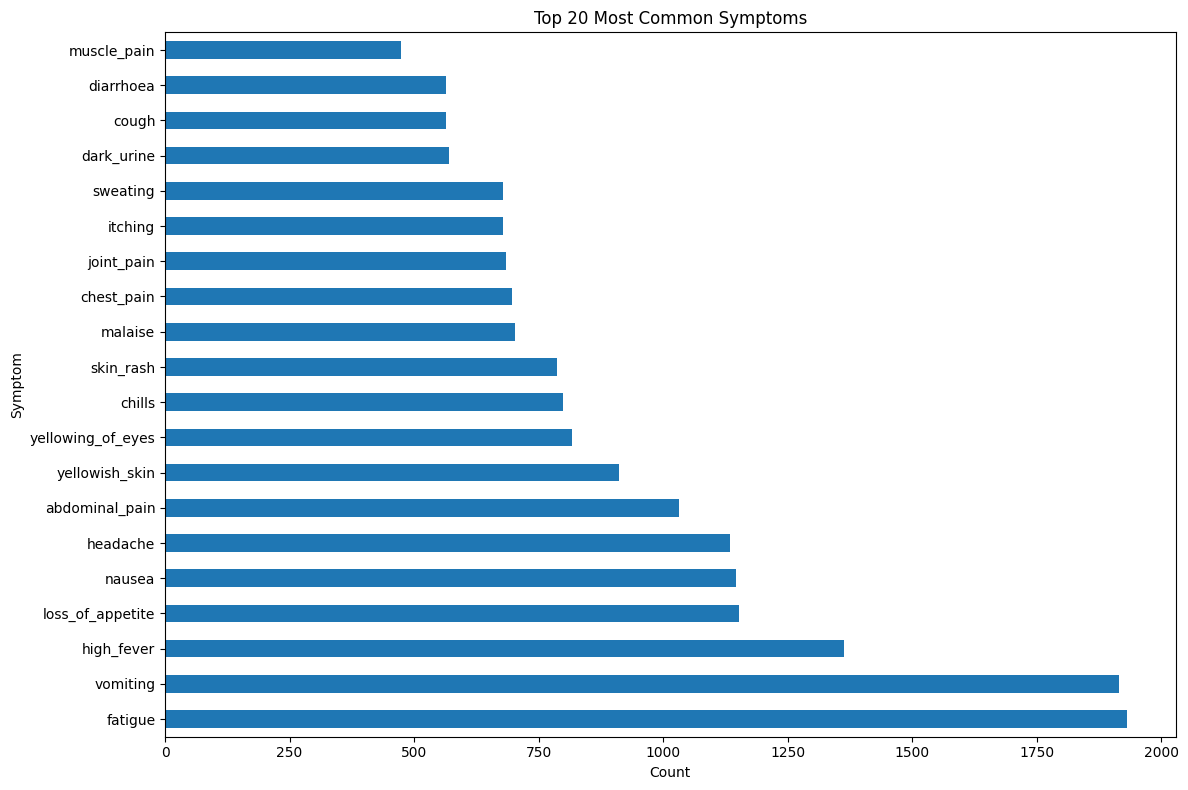

In [3]:
# Step 3: Exploratory Data Analysis (EDA)
# Analyze class distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='prognosis', data=train_df, order=train_df['prognosis'].value_counts().index)
plt.title("Disease Class Distribution in Training Data")
plt.xlabel("Count")
plt.ylabel("Disease")
plt.tight_layout()
plt.show()

# Analyze symptom distribution (top 20)
plt.figure(figsize=(12, 8))
train_df.drop('prognosis', axis=1).sum().sort_values(ascending=False)[:20].plot(kind='barh')
plt.title("Top 20 Most Common Symptoms")
plt.xlabel("Count")
plt.ylabel("Symptom")
plt.tight_layout()
plt.show()

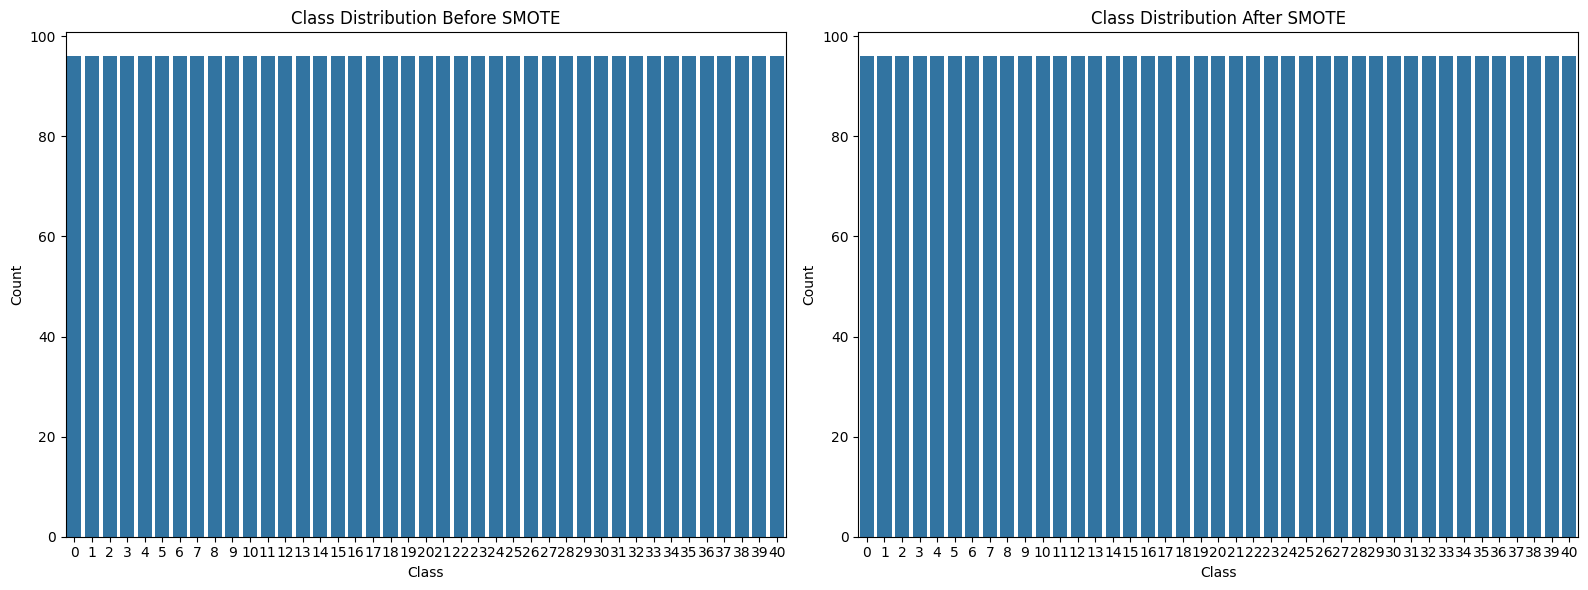

In [4]:
# Step 4: Data Preprocessing
# Prepare features and target
X = train_df.drop('prognosis', axis=1)
y = train_df['prognosis']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Visualize class distribution before and after SMOTE
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.countplot(x=y_train_balanced)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [5]:
# Step 5: Model Training
# Initialize models
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Train models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_balanced, y_train_balanced)
    print(f"{name} training complete.\n")

Training XGBoost...


C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:41:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost training complete.

Training CatBoost...
CatBoost training complete.

Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 3936, number of used features: 131
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from


=== XGBClassifier Evaluation (Validation Set) ===
Accuracy: 1.0

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                   

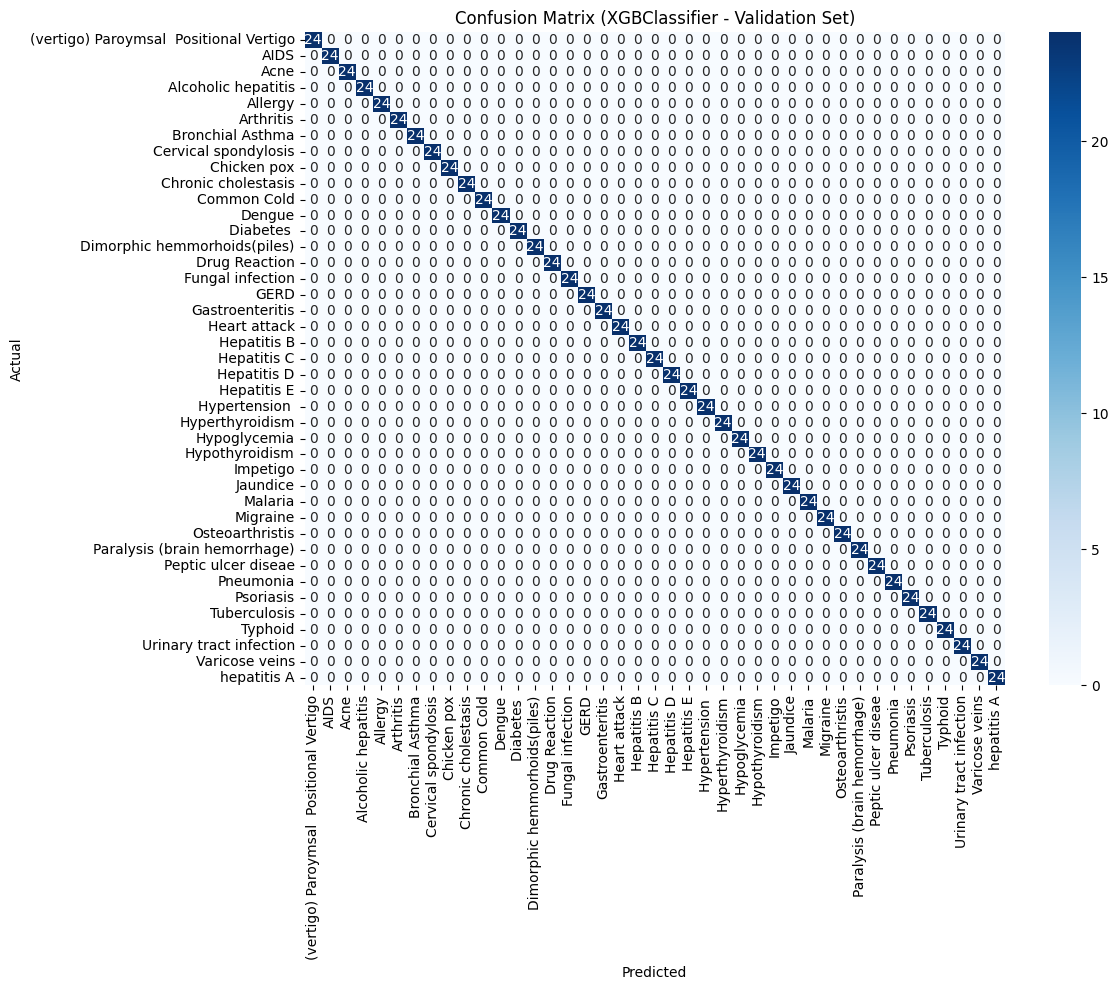


=== CatBoostClassifier Evaluation (Validation Set) ===
Accuracy: 1.0

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
              

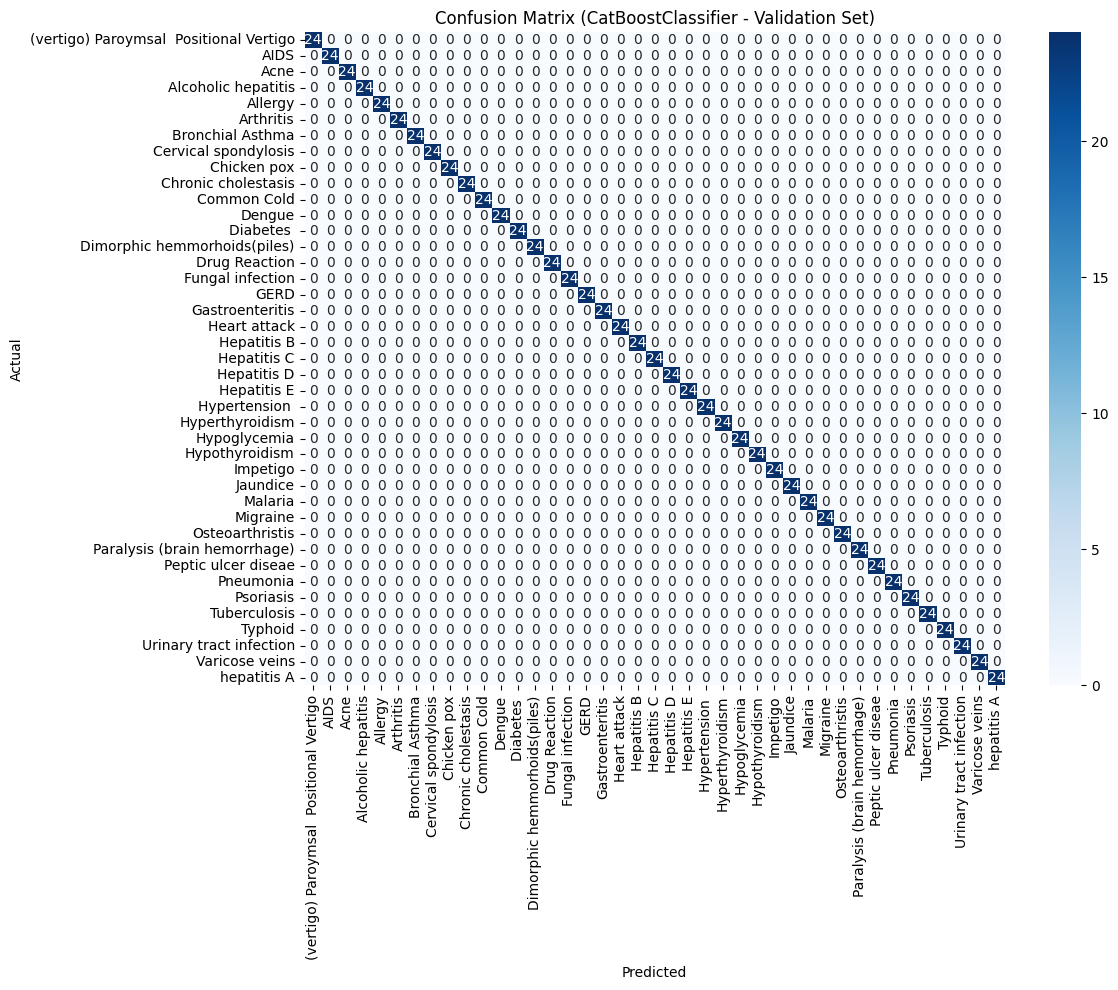


=== LGBMClassifier Evaluation (Validation Set) ===
Accuracy: 1.0

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                  

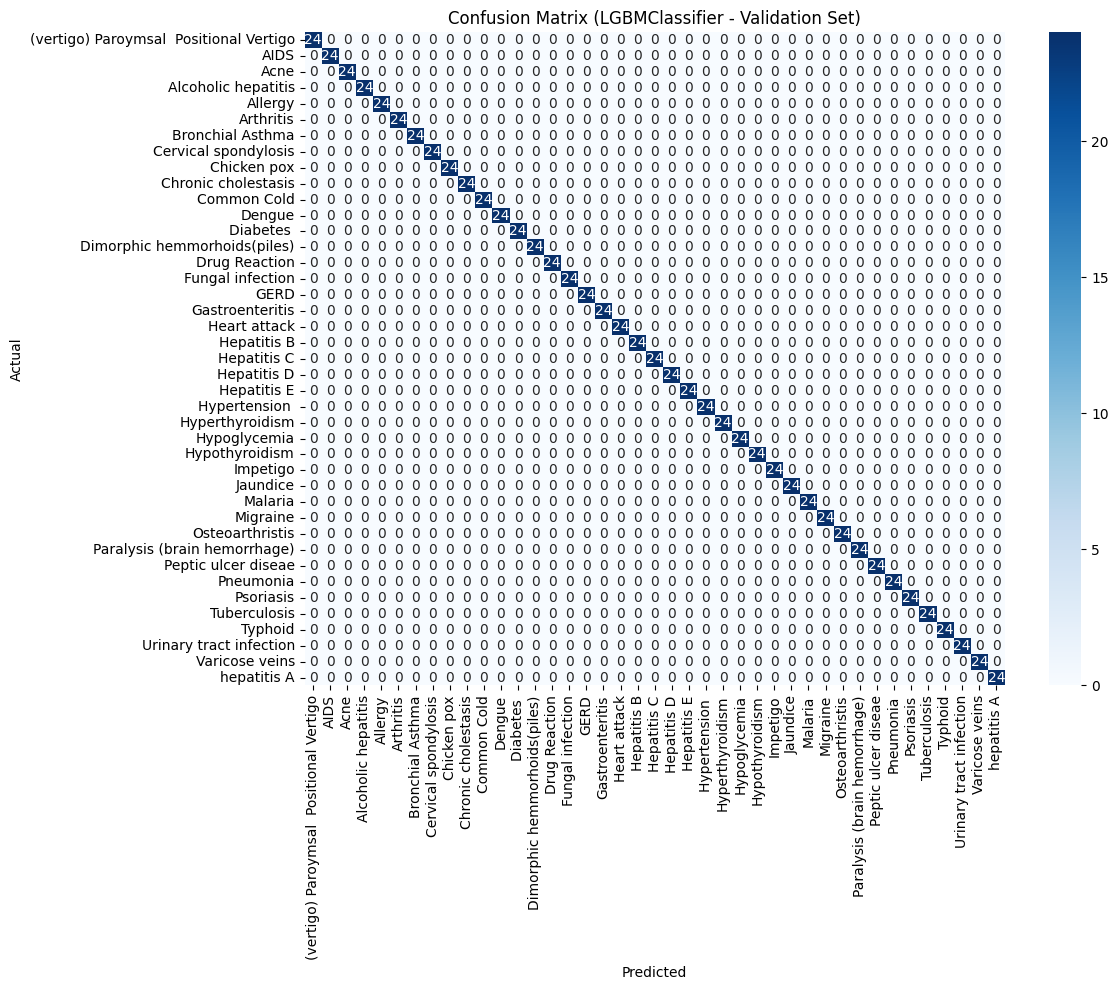


=== XGBClassifier Evaluation (Test Set) ===
Accuracy: 0.9761904761904762

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
          

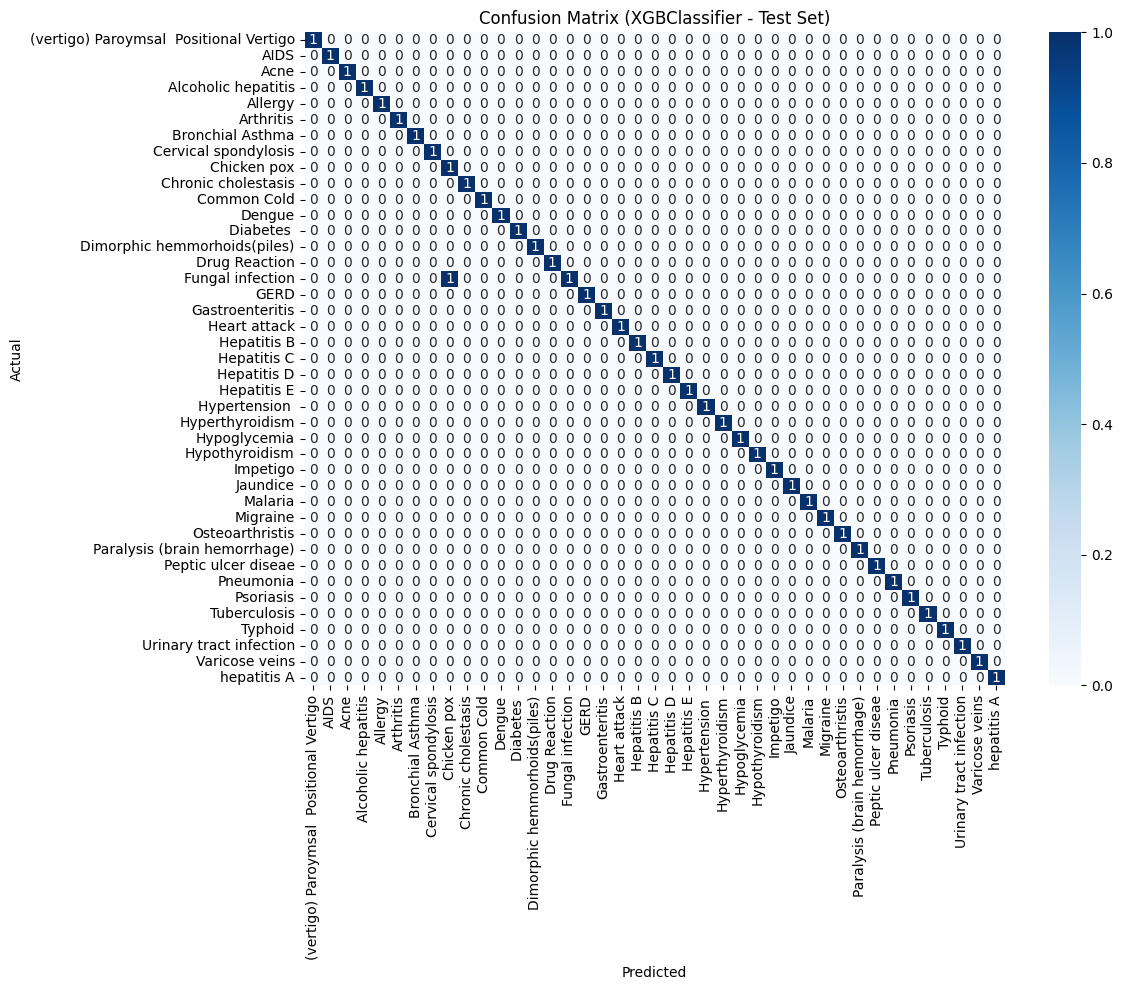


=== CatBoostClassifier Evaluation (Test Set) ===
Accuracy: 1.0

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                    

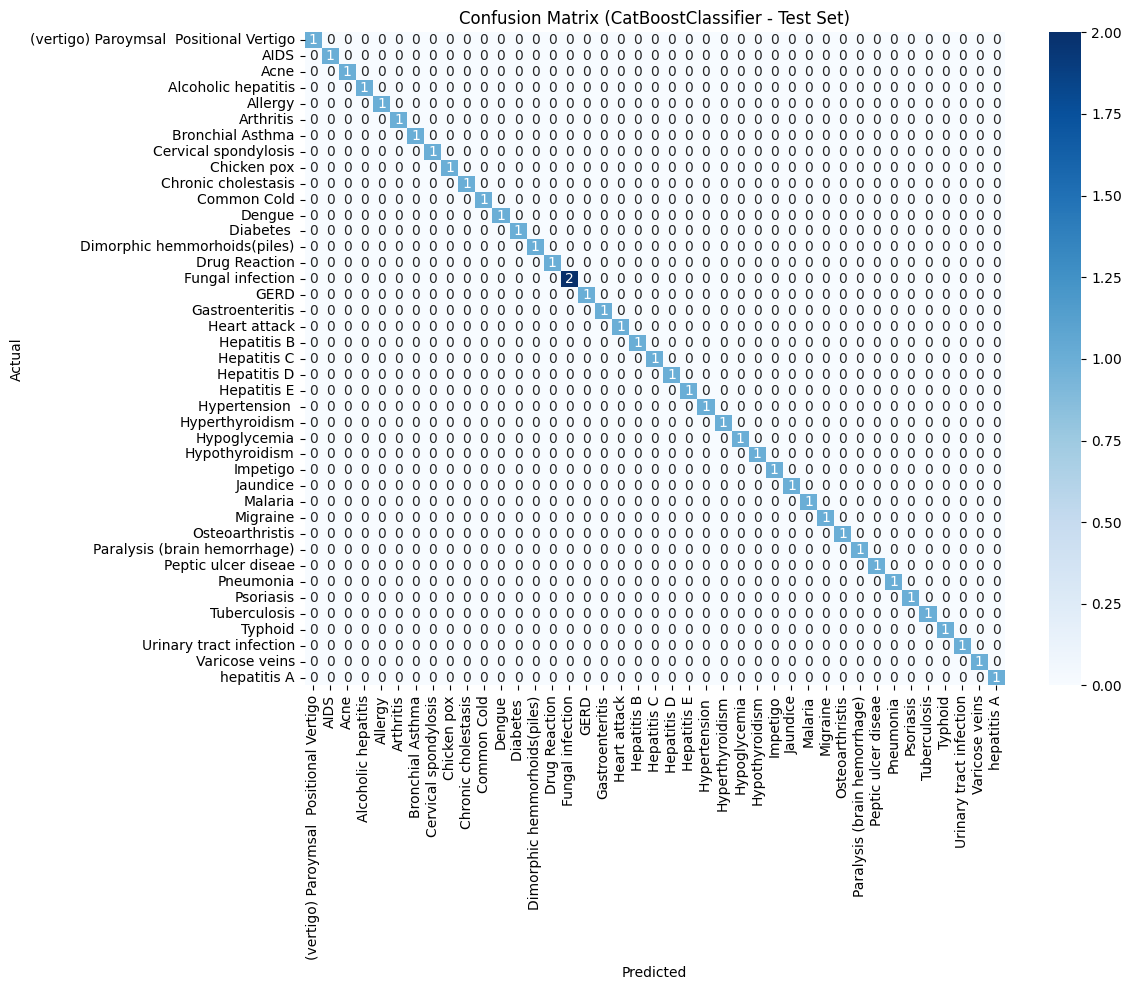


=== LGBMClassifier Evaluation (Test Set) ===
Accuracy: 0.9761904761904762

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
         

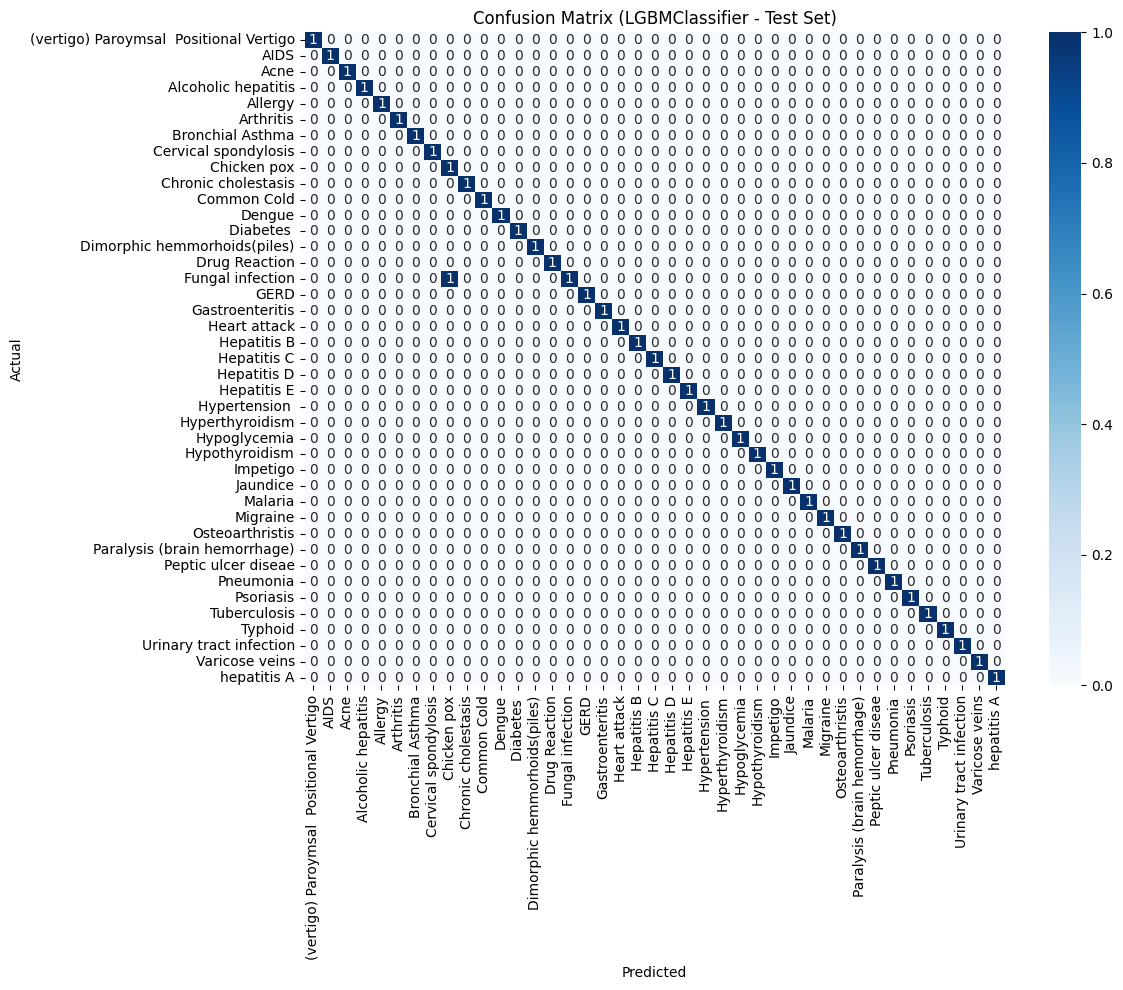

In [6]:
# Step 6: Model Evaluation
def evaluate_model(model, X, y_true, set_name=""):
    """Helper function to evaluate model performance"""
    y_pred = model.predict(X)
    
    print(f"\n=== {model.__class__.__name__} Evaluation ({set_name}) ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=le.classes_))
    
    # Plot confusion matrix
    plt.figure(figsize=(12, 10))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix ({model.__class__.__name__} - {set_name})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Evaluate on validation set
for name, model in models.items():
    evaluate_model(model, X_val, y_val, "Validation Set")

# Prepare test set
X_test = test_df.drop('prognosis', axis=1)
y_test = le.transform(test_df['prognosis'])

# Evaluate on test set
for name, model in models.items():
    evaluate_model(model, X_test, y_test, "Test Set")

In [7]:
# Step 7: Cross-Validation and Robustness Testing
# Cross-validation
print("\n=== Cross-Validation Results ===")
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5)
    print(f"{name} CV Scores:", cv_scores)
    print(f"{name} Mean Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})\n")

# Noise robustness test
X_test_noisy = X_test.copy()
np.random.seed(42)
flip_cols = np.random.choice(X_test.columns, size=5, replace=False)
for col in flip_cols:
    X_test_noisy[col] = 1 - X_test_noisy[col]  # flip 0 ↔ 1

print("\n=== Noise Robustness Test ===")
print("Flipped columns:", flip_cols.tolist())
for name, model in models.items():
    y_pred_noisy = model.predict(X_test_noisy)
    print(f"{name} Noisy Test Accuracy: {accuracy_score(y_test, y_pred_noisy):.4f}")


=== Cross-Validation Results ===


C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:42:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:42:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:42:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:42:20] WARNING: C:\actions-r

XGBoost CV Scores: [1.        1.        1.        1.        0.9974587]
XGBoost Mean Accuracy: 0.9995 (±0.0010)

CatBoost CV Scores: [1. 1. 1. 1. 1.]
CatBoost Mean Accuracy: 1.0000 (±0.0000)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 3148, number of used features: 131
[LightGBM] [Info] Start training from score -3.710717
[LightGBM] [Info] Start training from score -3.710717
[LightGBM] [Info] Start training from score -3.710717
[LightGBM] [Info] Start training from score -3.723789
[LightGBM] [Info] Start training from score -3.710717
[LightGBM] [Info] Start training from score -3.710717
[LightGBM] [Info] Start training from score -3.710717


=== Final Model Comparison ===


,Model,Validation Accuracy,Test Accuracy,Noisy Test Accuracy
0,XGBoost,1.0,0.97619,0.97619
1,CatBoost,1.0,1.00000,0.97619
2,LightGBM,1.0,0.97619,0.97619


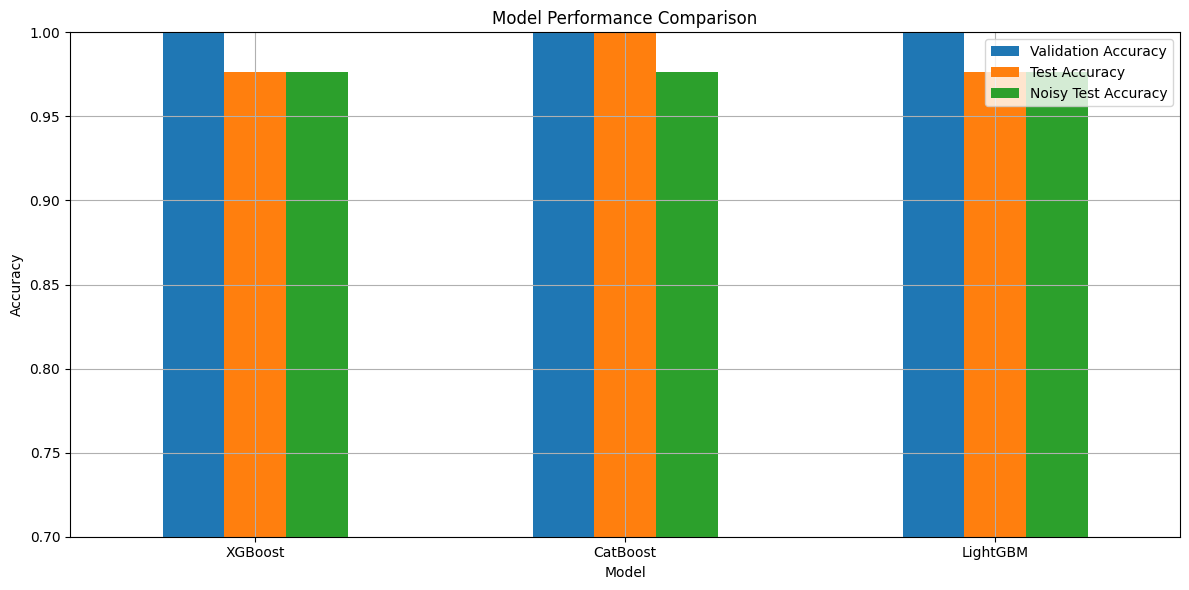


Best performing model: CatBoost


In [8]:
# Step 8: Model Comparison and Selection
# Compare model performance
results = {
    "Model": list(models.keys()),
    "Validation Accuracy": [accuracy_score(y_val, model.predict(X_val)) for model in models.values()],
    "Test Accuracy": [accuracy_score(y_test, model.predict(X_test)) for model in models.values()],
    "Noisy Test Accuracy": [accuracy_score(y_test, model.predict(X_test_noisy)) for model in models.values()]
}

results_df = pd.DataFrame(results)
print("\n=== Final Model Comparison ===")
display(results_df)

# Visual comparison
results_df.set_index("Model").plot(kind="bar", figsize=(12, 6), ylim=(0.7, 1.0))
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Select best model (highest test accuracy)
best_model_name = results_df.loc[results_df['Test Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]
print(f"\nBest performing model: {best_model_name}")

In [11]:
# Step 9: Prediction Function
def predict_disease(symptoms, model=best_model, label_encoder=le, feature_names=X.columns):
    """
    Predict disease based on input symptoms
    
    Args:
        symptoms: Dictionary of symptoms with values (1 for present, 0 for absent)
        model: Trained classifier model
        label_encoder: Fitted LabelEncoder for disease classes
        feature_names: List of feature names expected by the model
        
    Returns:
        Predicted disease and confidence scores
    """
    # Create input dataframe
    input_data = {col: 0 for col in feature_names}
    input_data.update(symptoms)
    input_df = pd.DataFrame([input_data])[feature_names]
    
    # Make prediction
    prediction = model.predict(input_df)
    probabilities = model.predict_proba(input_df)[0]
    
    # Get top 3 predictions
    top3_idx = np.argsort(probabilities)[-3:][::-1]
    top3_diseases = label_encoder.inverse_transform(top3_idx)
    top3_probs = probabilities[top3_idx]
    
    results = {
        "predicted_disease": label_encoder.inverse_transform(prediction)[0],
        "confidence": probabilities[prediction][0],
        "top3_predictions": list(zip(top3_diseases, top3_probs))
    }
    
    return results

# Example usage
example_symptoms = {
    'itching':1,
    'skin_rash':1,
    'nodal_skin_eruptions':1,
    'continuous_sneezing':1	
}

prediction = predict_disease(example_symptoms)
print("\n=== Example Prediction ===")
print("Predicted Disease:", prediction["predicted_disease"])
print("Confidence:", f"{prediction['confidence']:.2%}")
print("\nTop 3 Predictions:")
for disease, prob in prediction["top3_predictions"]:
    print(f"- {disease}: {prob:.2%}")


=== Example Prediction ===
Predicted Disease: Fungal infection


C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: unsupported format string passed to numpy.ndarray.__format__